In [136]:
import pandas as pd # Usa pandas para cargar el archivo (validar siempre la ruta)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Visualización de datos en conjunto con matplotlib
from scipy import stats #se utiliza para realizar análisis estadísticos. Es especialmente útil en trabajos de análisis de datos, pruebas de hipótesis y modelado estadístico.
import os


In [137]:
# 
report = r'Files\violencia_intrafamiliar.csv'
df = pd.read_csv(report,sep=',')
ruta_absoluta = os.path.abspath(report)
print(ruta_absoluta)
print("Data Violencia Domestica Colombia")
print(df.dtypes)
print(df.head(5))

C:\Users\andre\AppData\Local\Temp\ipykernel_24144\525810294.py:3: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



c:\HAD\Unidad_1\Trabajo\Analitica_datos\Files\violencia_intrafamiliar.csv
Data Violencia Domestica Colombia
DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object
   DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD  
0   1/01/2010  MASCULINO      ADULTOS         1  
1   1/01/2010   FEMENINO      ADULTOS         1  
2   1/01/2010  MASCULINO      ADULTOS         1  
3   1/01/2010   FEM

In [138]:
df =df.drop('CODIGO DANE',axis=1).copy() # Eliminamos Codigo Dane de la Base ya que no
print(df.dtypes)
print(df.head(5))

DEPARTAMENTO    object
MUNICIPIO       object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object
   DEPARTAMENTO          MUNICIPIO                 ARMAS MEDIOS FECHA HECHO  \
0     ATLÁNTICO  BARRANQUILLA (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
1        BOYACÁ            DUITAMA  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
2       CAQUETÁ        PUERTO RICO  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
3      CASANARE               MANÍ  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   

      GENERO GRUPO ETARIO  CANTIDAD  
0  MASCULINO      ADULTOS         1  
1   FEMENINO      ADULTOS         1  
2  MASCULINO      ADULTOS         1  
3   FEMENINO      ADULTOS         1  
4   FEMENINO      ADULTOS         1  


In [139]:
# porcentaje de valores nulos en cada columna
info_vacia = df.isnull().sum() * 100 / df.shape[0]

# porcentaje y  cantidad total de valores nulos
print(f'{info_vacia}\n\n{df.isnull().sum()}')


DEPARTAMENTO    0.000000
MUNICIPIO       0.000000
ARMAS MEDIOS    0.000000
FECHA HECHO     0.000000
GENERO          0.000000
GRUPO ETARIO    0.240257
CANTIDAD        0.000000
dtype: float64

DEPARTAMENTO       0
MUNICIPIO          0
ARMAS MEDIOS       0
FECHA HECHO        0
GENERO             0
GRUPO ETARIO    1611
CANTIDAD           0
dtype: int64


In [140]:
#Eliminación de valores nulos de la columna Grupo Etario
df = df[~df['GRUPO ETARIO'].isnull()]
df = df.loc[:, ~df.columns.duplicated()].copy()
print(df.head(5))

   DEPARTAMENTO          MUNICIPIO                 ARMAS MEDIOS FECHA HECHO  \
0     ATLÁNTICO  BARRANQUILLA (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
1        BOYACÁ            DUITAMA  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
2       CAQUETÁ        PUERTO RICO  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
3      CASANARE               MANÍ  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   

      GENERO GRUPO ETARIO  CANTIDAD  
0  MASCULINO      ADULTOS         1  
1   FEMENINO      ADULTOS         1  
2  MASCULINO      ADULTOS         1  
3   FEMENINO      ADULTOS         1  
4   FEMENINO      ADULTOS         1  


In [141]:
df['GENERO']=df['GENERO'].astype(str)
df['GRUPO ETARIO']=df['GRUPO ETARIO'].astype(str)
df['ARMAS MEDIOS']=df['ARMAS MEDIOS'].astype(str)
df['CANTIDAD']=pd.to_numeric(df['CANTIDAD'],errors='coerce')
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')
df.dtypes

DEPARTAMENTO            object
MUNICIPIO               object
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
dtype: object

In [142]:
# Cambio de genero - No reporta
df['GENERO'] = df['GENERO'].replace('NO REPORTADO', 'NO REPORTA')

# Cambio de Grupo Etario - No Reporta
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].replace('NO REPORTADO', 'NO REPORTA')

# Cambio de tipo de Arma - Segun codigo penal
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'ARMA BLANCA / CORTOPUNZANTE':'ARMA BLANCA','-':'NO REPORTA','NO REPORTADO':'NO REPORTA','CORTOPUNZANTES':'ARMA BLANCA','CORTANTES':'ARMA BLANCA','CONTUNDENTES':'ARMA BLANCA','PUNZANTES':'ARMA BLANCA'})

In [143]:
print(df['GENERO'].unique())
print(df['GRUPO ETARIO'].unique())
print(df['ARMAS MEDIOS'].unique())

['MASCULINO' 'FEMENINO' 'NO REPORTA']
['ADULTOS' 'ADOLESCENTES' 'MENORES' 'NO REPORTA']
['ARMA BLANCA' 'ARMA DE FUEGO' 'NO REPORTA' 'SIN EMPLEO DE ARMAS'
 'ESCOPOLAMINA']


Tratamiento de Valores atipicos

Este cambio se basa en el analisis de la variable Cantidad de la data trabaja

Dado que cada fila del conjuto de datos reprenta un unico registro, se considera oprtuno eliminar los registros con casos superiores a 20, debido a que es absurdo pensar  que se haya notificado un unico incidente de violencia domestica com mas de 20 victimas en el mismo lugar. Esto podria deberse a un error de introducción de datos, ya que hay casos que superan los 100

In [144]:
df_filtered = df[df['CANTIDAD'] > 20]  # Filtrar filas donde 'CANTIDAD' es mayor a 20
count = df_filtered['CANTIDAD'].count()  # Contar las filas que cumplen la condición
print(count)

4622


Prueba de Hipotesis
H0: El tipo de arma no influye significativamente en la cantidad de casos.
H1: El tipo de arma tiene un efecto significativo en la cantidad de casos reportados.

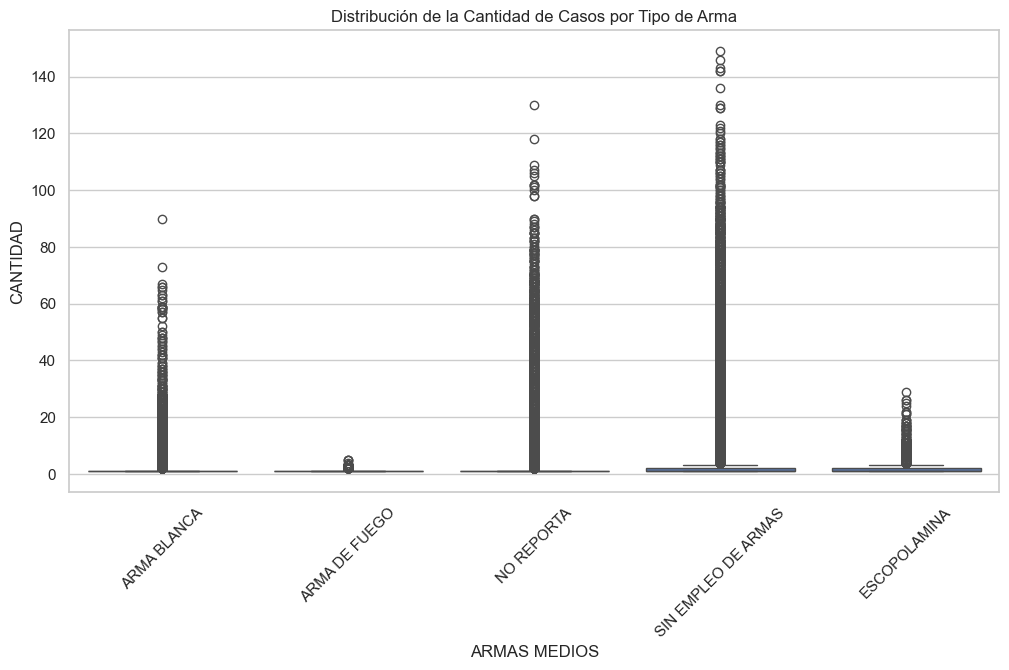

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de casos por tipo de arma - (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='ARMAS MEDIOS', y='CANTIDAD', data=df)
plt.title('Distribución de la Cantidad de Casos por Tipo de Arma')
plt.xticks(rotation=45)
plt.show()


In [146]:
# Agrupar los datos por tipo de arma y convertirlos a listas para ANOVA
arma_grupos = [grupo['CANTIDAD'].values for nombre, grupo in df.groupby('ARMAS MEDIOS')]

# Prueba ANOVA de una vía
f_stat, p_value = stats.f_oneway(*arma_grupos)
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0): El tipo de arma tiene un efecto significativo en la cantidad de casos reportados.")
else:
    print("No podemos rechazar la hipótesis nula (H0): El tipo de arma no influye significativamente en la cantidad de casos.")


# Interpretación de los resultados 
# Si el valor p es menor que el nivel de significancia (α = 0.05), se rechaza la hipótesis nula, indicando que el tipo de arma tiene un efecto significativo en la cantidad de casos.
# Si el valor p es mayor que α, no se puede rechazar la hipótesis nula, lo que sugiere que no hay suficiente evidencia para afirmar que el tipo de arma influye en la cantidad de casos. Esto implica que hay diferencias significativas en la cantidad de casos entre al menos dos tipos de armas.

Estadístico F: 1540.601364171339
Valor p: 0.0
Rechazamos la hipótesis nula (H0): El tipo de arma tiene un efecto significativo en la cantidad de casos reportados.


 EDA (Exploratory Data Analysis)

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px # Para crear graficos interactivos con ploty, comno mapas de calor y graficos de dispersión
import plotly.graph_objs as go

from phik import phik_matrix # Phik constante de correlación práctica que funciona de manera consistente entre variables categóricas, ordinales y de intervalo
from numpy import log10 # Proporciono funciones matematicas y un valor NaN (Nulo)
import numpy as np  
from json import load # Permite cargar datos JSON desde URLS
from seaborn import heatmap, set_theme 
from plotly.subplots import make_subplots # Crea subgraficos para disposición compleja de graficos
 
 # Configuración de Temas y Estilos
set_theme(style="ticks", context="talk", palette="tab10")
plt.rcParams.update({'font.size': 12})


Distribucción de columnas
- Podemos ver que en 2020 tuvo un gran aumento de casos, y se tiene una gran concentración de casos de 1 a 2 casos por fila 

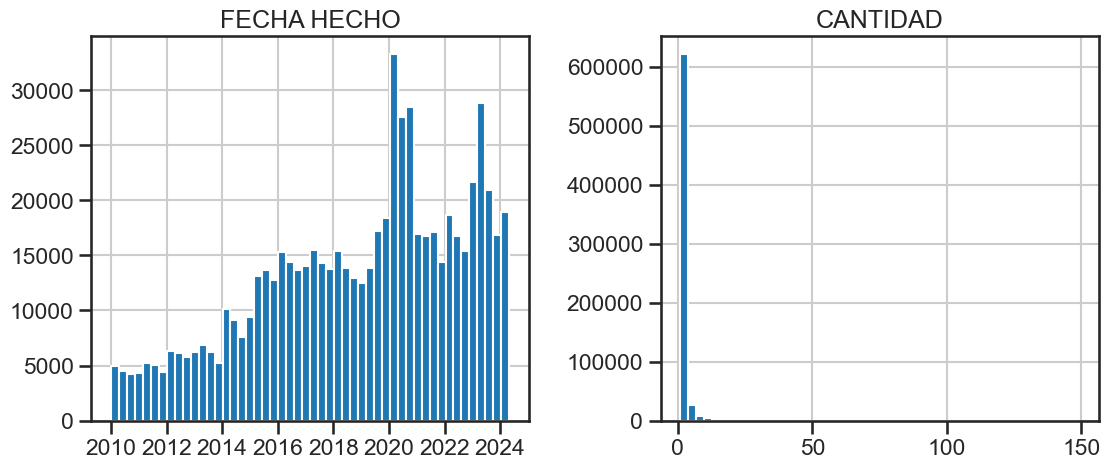

In [148]:
df.hist(figsize=(13, 5), bins=50) # histograma
plt.show()


Visualización de Datos

In [149]:
df.describe(exclude='datetime') # Resumen estadistico 

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD
count,668921,668921,668921,668921,668921,668921.000000
unique,34,2027,5,3,4,NaN
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),ARMA BLANCA,FEMENINO,ADULTOS,NaN
freq,119664,57701,350212,504168,583964,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.858218
std,NaN,NaN,NaN,NaN,NaN,4.148295
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000


In [150]:
# ¿Que departamentos tiene mas casos y como se distribuyen?
tabla_departamento = pd.pivot_table(df, index = ('DEPARTAMENTO'), values = 'CANTIDAD', columns = None, aggfunc='count').reset_index()
tabla_departamento.sort_values(by='CANTIDAD', ascending=False)


,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,119664
1,ANTIOQUIA,83859
31,VALLE,61978
28,SANTANDER,51098
5,BOYACÁ,38127
30,TOLIMA,25084
3,ATLÁNTICO,24970
4,BOLÍVAR,22925
17,HUILA,22608
19,META,22430


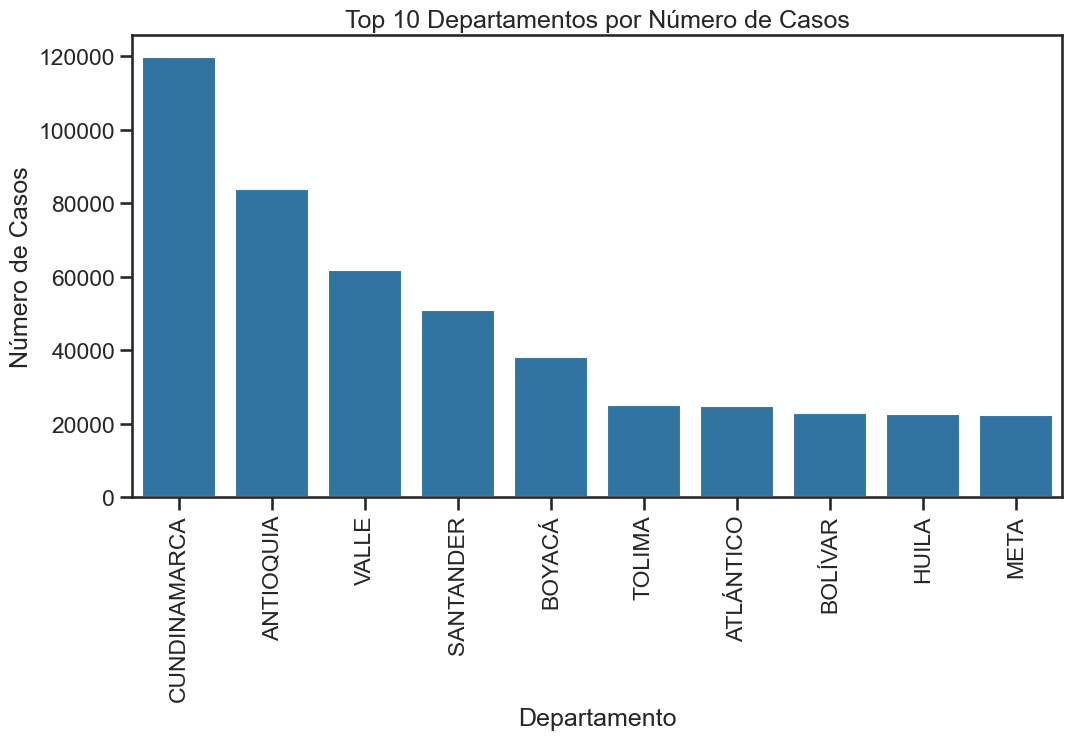

In [155]:
count_depart = df['DEPARTAMENTO'].value_counts()
top_10 = count_depart.nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values)
ax.set_title('Top 10 Departamentos por Número de Casos')
ax.set_xlabel('Departamento')
ax.set_ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.show()

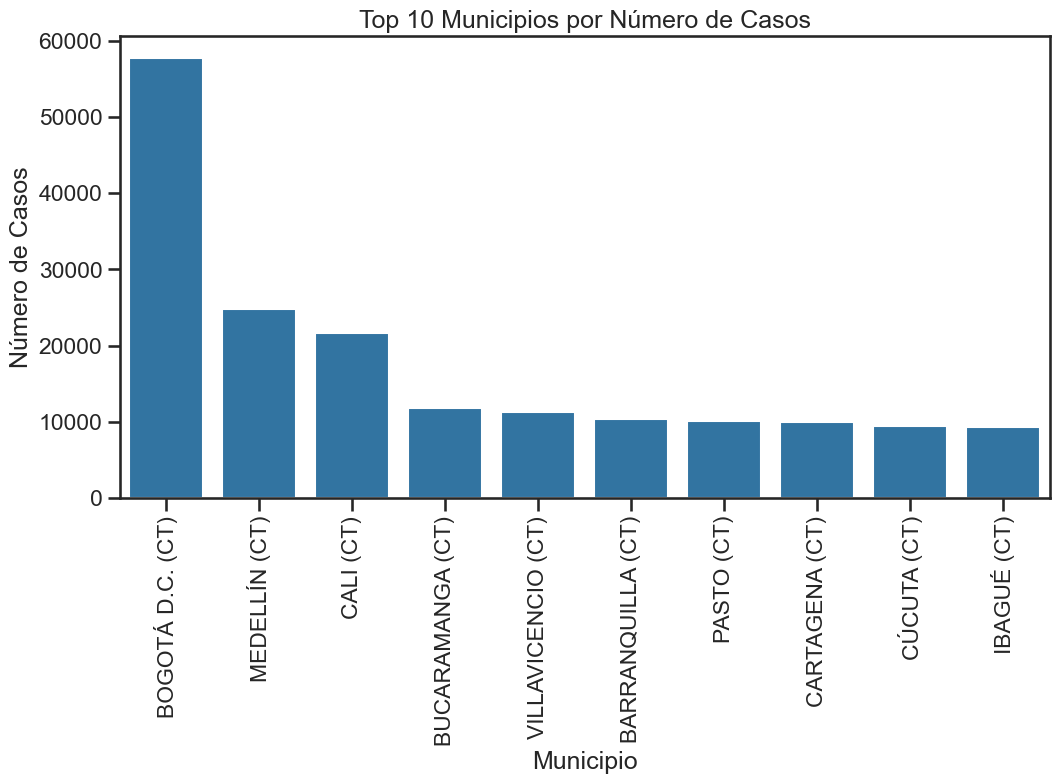

In [154]:
count_municipio = df['MUNICIPIO'].value_counts()
top_10 = count_municipio.nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values)
ax.set_title('Top 10 Municipios por Número de Casos')
ax.set_xlabel('Municipio')
ax.set_ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.show()

Que tipo de arma es la mas comun : las armas mas utilizadas en los casos de violencia intrafamiliar en Colombia es el arma blanca, seguido del no uso de armas. 

In [152]:
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'ARMA BLANCA / CORTOPUNZANTE':'ARMA BLANCA','-':'NO REPORTA','NO REPORTADO':'NO REPORTA','CORTOPUNZANTES':'ARMA BLANCA','CORTANTES':'ARMA BLANCA','CONTUNDENTES':'ARMA BLANCA','PUNZANTES':'ARMA BLANCA'})

# tabla dinámica para contar el número de casos por tipo de arma
tipo_de_arma = pd.pivot_table(df, index='ARMAS MEDIOS', values='CANTIDAD', aggfunc='count').reset_index()

# Ordenar la tabla por la columna 'CANTIDAD' en orden descendente
tipo_de_arma.sort_values(by='CANTIDAD', ascending=False, inplace=True)

# Mostrar la tabla
print(tipo_de_arma)

          ARMAS MEDIOS  CANTIDAD
0          ARMA BLANCA    350212
4  SIN EMPLEO DE ARMAS    235567
3           NO REPORTA     76330
2         ESCOPOLAMINA      3863
1        ARMA DE FUEGO      2949


In [153]:
import plotly.express as px

print(tipo_de_arma.head())

# Crear un gráfico de barras con Plotly
tipo_de_arma_graph = px.bar(
tipo_de_arma,  # DataFrame que contiene los datos
    x='ARMAS MEDIOS',  # Columna que se usará en el eje X
    y='CANTIDAD',  # Columna que se usará en el eje Y
    text_auto='.2s',  # Mostrar valores automáticos en las barras con formato
    title='Tipo de Armas Usadas'  # Título del gráfico
)

# Actualizar el trazado para personalizar el texto
tipo_de_arma_graph.update_traces(
    textfont_size=12,  # Tamaño de la fuente del texto
    textangle=0,  # Ángulo del texto
    textposition="outside",  # Posición del texto fuera de las barras
    cliponaxis=False  # Permite que el texto sobresalga fuera del eje
)

# Mostrar el gráfico
tipo_de_arma_graph.show()
tipo_de_arma_graph.write_html('graphics/weapon.html') #usado para crear el grafico

 

          ARMAS MEDIOS  CANTIDAD
0          ARMA BLANCA    350212
4  SIN EMPLEO DE ARMAS    235567
3           NO REPORTA     76330
2         ESCOPOLAMINA      3863
1        ARMA DE FUEGO      2949


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Genero

In [ ]:
# Agrupar por 'GENERO' y contar la cantidad de ocurrencias en la columna 'CANTIDAD'
casos_por_genero = df.groupby('GENERO')['CANTIDAD'].count()

# Mostrar el resultado
print(casos_por_genero)


GENERO
FEMENINO      504168
MASCULINO     163504
NO REPORTA      1249
Name: CANTIDAD, dtype: int64


C:\Users\andre\AppData\Local\Temp\ipykernel_24144\1598762976.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# Crear la tabla dinámica
df_genero_armas = pd.pivot_table(
    df, 
    index=('GENERO', 'ARMAS MEDIOS'),  # Agrupar por 'GENERO' y 'ARMAS MEDIOS'
    values='CANTIDAD',  # Contar la columna 'CANTIDAD'
    aggfunc='count'  # Contar las ocurrencias
).reset_index()

# Mostrar el resultado
print(df_genero_armas)


        GENERO         ARMAS MEDIOS  CANTIDAD
0     FEMENINO          ARMA BLANCA    268591
1     FEMENINO        ARMA DE FUEGO      2470
2     FEMENINO         ESCOPOLAMINA      2984
3     FEMENINO           NO REPORTA     57027
4     FEMENINO  SIN EMPLEO DE ARMAS    173096
5    MASCULINO          ARMA BLANCA     81434
6    MASCULINO        ARMA DE FUEGO       479
7    MASCULINO         ESCOPOLAMINA       877
8    MASCULINO           NO REPORTA     19195
9    MASCULINO  SIN EMPLEO DE ARMAS     61519
10  NO REPORTA          ARMA BLANCA       187
11  NO REPORTA        ARMA DE FUEGO         0
12  NO REPORTA         ESCOPOLAMINA         2
13  NO REPORTA           NO REPORTA       108
14  NO REPORTA  SIN EMPLEO DE ARMAS       952


C:\Users\andre\AppData\Local\Temp\ipykernel_24144\1926645010.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [ ]:
# Reemplazar el valor 'NO REPORTA' por NaN en la columna 'GENERO'
df_genero_armas['GENERO'] = df_genero_armas['GENERO'].replace({'NO REPORTA': pd.NA})

# Eliminar filas donde 'GENERO' sea NaN
df_genero_armas = df_genero_armas[~df_genero_armas['GENERO'].isnull()]

# Mostrar el resultado
print(df_genero_armas)


       GENERO         ARMAS MEDIOS  CANTIDAD
0           -          ARMA BLANCA         4
1           -  SIN EMPLEO DE ARMAS         3
2    FEMENINO          ARMA BLANCA    268614
3    FEMENINO        ARMA DE FUEGO      2470
4    FEMENINO         ESCOPOLAMINA      2984
5    FEMENINO           NO REPORTA     57046
6    FEMENINO  SIN EMPLEO DE ARMAS    174055
7   MASCULINO          ARMA BLANCA     81462
8   MASCULINO        ARMA DE FUEGO       479
9   MASCULINO         ESCOPOLAMINA       877
10  MASCULINO           NO REPORTA     19203
11  MASCULINO  SIN EMPLEO DE ARMAS     62086


In [ ]:
import plotly.express as px


# Crear un DataFrame con los datos necesarios
df_genero_armas = pd.pivot_table(
    df, 
    index=('GENERO', 'ARMAS MEDIOS'), 
    values='CANTIDAD', 
    aggfunc='count'
).reset_index()

# Crear un gráfico de barras 
fig_genero = px.bar(
    df_genero_armas,
    x='GENERO',  # Columna para el eje X
    y='CANTIDAD',  # Columna para el eje Y
    color='ARMAS MEDIOS',  # Columna que define los colores de las barras
    barmode='group',
    text_auto='.2s',
    title="Gráfico de género y número de casos según tipo de arma",
    labels={'CANTIDAD': 'Número de casos', 'GENERO': 'Género y Tipo de Arma'},
    height=400
)

# Personalizar el trazado del gráfico
fig_genero.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

# Mostrar el gráfico
fig_genero.show()
fig_genero.write_html('graphics/genre.html') #usado para crear el grafico




C:\Users\andre\AppData\Local\Temp\ipykernel_24144\2742145983.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Como se relaciona el Genero con el Grupo Etario (edad)
la mayoría de los individuos afectados son mujeres adultas, mientras que el número de menores afectados varía poco entre hombres y mujeres.

In [ ]:
df.groupby(['GENERO', 'GRUPO ETARIO'])['CANTIDAD'].count()

C:\Users\andre\AppData\Local\Temp\ipykernel_24144\1151541735.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



GENERO      GRUPO ETARIO
FEMENINO    ADOLESCENTES     28809
            ADULTOS         455443
            MENORES          19915
            NO REPORTA           1
MASCULINO   ADOLESCENTES     13236
            ADULTOS         128503
            MENORES          21765
            NO REPORTA           0
NO REPORTA  ADOLESCENTES         0
            ADULTOS             18
            MENORES              2
            NO REPORTA        1229
Name: CANTIDAD, dtype: int64

In [ ]:
# Crear la tabla dinámica
df_genero_edad = pd.pivot_table(
    df, 
    index=('GENERO', 'GRUPO ETARIO'),  # Agrupa por 'GENERO' y 'GRUPO ETARIO'
    values='CANTIDAD',  # Contar la columna 'CANTIDAD'
    aggfunc='count'  # Función de conteo
).reset_index()

# Mostrar el resultado
print(df_genero_edad)


        GENERO  GRUPO ETARIO  CANTIDAD
0     FEMENINO  ADOLESCENTES     28809
1     FEMENINO       ADULTOS    455443
2     FEMENINO       MENORES     19915
3     FEMENINO    NO REPORTA         1
4    MASCULINO  ADOLESCENTES     13236
5    MASCULINO       ADULTOS    128503
6    MASCULINO       MENORES     21765
7    MASCULINO    NO REPORTA         0
8   NO REPORTA  ADOLESCENTES         0
9   NO REPORTA       ADULTOS        18
10  NO REPORTA       MENORES         2
11  NO REPORTA    NO REPORTA      1229


C:\Users\andre\AppData\Local\Temp\ipykernel_24144\2881467994.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [ ]:
import plotly.express as px

df_genero_edad = pd.pivot_table(
    df, 
    index=('GENERO', 'GRUPO ETARIO'), 
    values='CANTIDAD', 
    aggfunc='count'
).reset_index()

# Crear un gráfico de barras adaptado a tu archivo
fig_genero_edad = px.bar(
    df_genero_edad,
    x='GENERO',  # Columna para el eje X (género)
    y='CANTIDAD',  # Columna para el eje Y (cantidad de casos)
    color='GRUPO ETARIO',  # Columna que define los colores de las barras (grupo etario)
    barmode='group',
    text_auto='.2s',
    title="Gráfico de género y número de casos por grupo etario",
    labels={'CANTIDAD': 'Número de casos', 'GENERO': 'Género'},
    height=400
)

# Personalizar el trazado del gráfico
fig_genero_edad.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

# Mostrar el gráfico
fig_genero_edad.show()
fig_genero_edad.write_html('graphics/age.html') #usado para crear el grafico



In [ ]:
# Convertir la columna 'FECHA HECHO' a formato datetime
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])

# Crear columnas con el nombre del día y el mes
df['DIA'] = df['FECHA HECHO'].dt.day_name()
df['MES'] = df['FECHA HECHO'].dt.month_name()

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())


   DEPARTAMENTO          MUNICIPIO CODIGO DANE ARMAS MEDIOS FECHA HECHO  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA  2010-01-01   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA  2010-01-01   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA  2010-01-01   
3      CASANARE               MANÍ    85139000  ARMA BLANCA  2010-01-01   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA  2010-01-01   

      GENERO GRUPO ETARIO  CANTIDAD     DIA      MES  
0  MASCULINO      ADULTOS         1  Friday  January  
1   FEMENINO      ADULTOS         1  Friday  January  
2  MASCULINO      ADULTOS         1  Friday  January  
3   FEMENINO      ADULTOS         1  Friday  January  
4   FEMENINO      ADULTOS         1  Friday  January  


In [ ]:
import pandas as pd
import plotly.express as px

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')
df.dtypes

# Asegurarte de que la columna 'FECHA HECHO' esté en formato datetime
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])

# Agrupar los datos por mes y año y sumar la cantidad de casos
df_tendencia = df.resample('ME', on='FECHA HECHO')['CANTIDAD'].sum().reset_index()

# Crear un gráfico interactivo con plotly
fig = px.line(
    df_tendencia,
    x='FECHA HECHO',
    y='CANTIDAD',
    title='Tendencia de los casos a lo largo del tiempo',
    labels={'CANTIDAD': 'Cantidad de casos', 'FECHA HECHO': 'Fecha'}
)

fig.update_traces(mode='lines+markers')
fig.show()
fig.write_html('graphics/overtime.html') #usado para crear el grafico


In [ ]:
import pandas as pd
import plotly.express as px

df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')

# Crear una columna para el nombre del mes y otra para el nombre del día de la semana
df['MES'] = df['FECHA HECHO'].dt.month_name()
df['DIA'] = df['FECHA HECHO'].dt.day_name()

# Agrupar por mes y sumar la cantidad de casos
df_mes = df.groupby('MES')['CANTIDAD'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]).reset_index()

# Agrupar por día de la semana y sumar la cantidad de casos
df_dia = df.groupby('DIA')['CANTIDAD'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Crear el gráfico de tendencia por mes
fig_mes = px.bar(
    df_mes,
    x='MES',
    y='CANTIDAD',
    title='Tendencia de los casos por mes',
    labels={'CANTIDAD': 'Cantidad de casos', 'MES': 'Mes'},
    text_auto=True
)
fig_mes.update_traces(marker_color='skyblue')
fig_mes.show()
fig_mes.write_html('graphics/month.html') #usado para crear el grafico carpeta/nombre.html


# Crear el gráfico de tendencia por día de la semana
fig_dia = px.bar(
    df_dia,
    x='DIA',
    y='CANTIDAD',
    title='Tendencia de los casos por día de la semana',
    labels={'CANTIDAD': 'Cantidad de casos', 'DIA': 'Día de la semana'},
    text_auto=True
)
fig_dia.update_traces(marker_color='lightgreen')
fig_dia.show()
fig_dia.write_html('graphics/day.html') #usado para crear el grafico carpeta/nombre.html

